# Bio-Signal Analysis for Smoking
# Agenda
**01 Importing the Libraries**

**02 Loading the Data**

**03 Data Cleaning**

**04 One Hot Encoding**

**05 Feature Selection** 

**06 Bagging Algorithms**


# Problem Statement
**Over the years, the company has 
collected details and gathered a lot of 
information about individuals. The 
management wants to build an intelligent 
system from the data to determine the 
presence or absence of smoking in a person 
through bio-signals. Given a person’s 
information, build a machine learning model 
that can classify the presence or absence of 
smoking.**

# Dataset Information
**This dataset is a collection of basic health biological signal data which
contains around 55K record with 27 attributes.**

# Importing the Libraries
**We start off this project by importing all the necessary
libraries that will be required for the process.**




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Loading the Data
**Loading the data and removing the irrelevant columns.**


In [2]:
df = pd.read_csv("C:\\Users\\91959\\Downloads\\smoking.csv")
df = df.drop(columns=['ID','oral'])
df.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,N,0


# Loading the Data
**Checking the shape of a dataframe and datatypes of all columns 
along with calculating the statistical data.**


In [3]:
df.shape

(55692, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

In [5]:
df.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,76.004830,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,9.679278,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,146.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


# Missing Values 
**Checking out the missing values in a dataframe**

In [6]:
df.isnull().sum()

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
tartar                 0
smoking                0
dtype: int64

# Data visualization
**We can clearly see from the below graph that most smokers are men.**

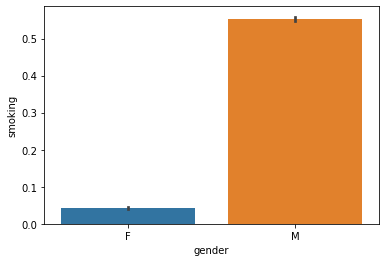

In [7]:
sns.barplot(data=df, x='gender',y='smoking')
plt.show()

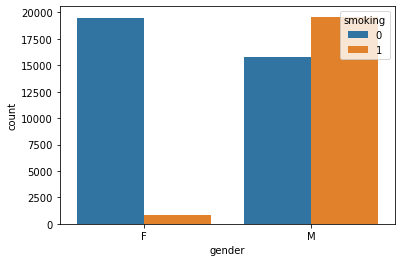

In [8]:
sns.countplot(data=df, x='gender', hue='smoking')
plt.show()

**There are 36.73 percent of the people who are smoking ciggarette.**

<AxesSubplot:ylabel='smoking'>

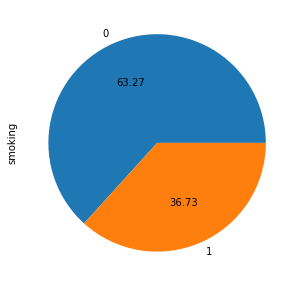

In [9]:
plt.figure(figsize=(10,5))
df['smoking'].value_counts().plot.pie(autopct='%0.2f')

**Most number of smokers are having the age 40**

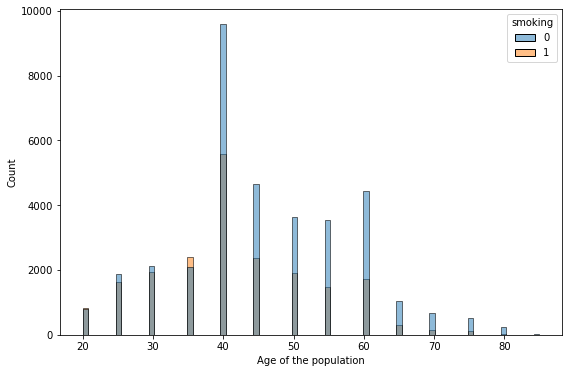

In [10]:
plt.figure(figsize=(9,6))
sns.histplot(data=df, x='age', hue='smoking')
plt.xlabel('Age of the population')
plt.show()

**Representation of columns using boxplot to detect outliers. Here outliers represent natural 
variations in the population, and they should be left as is in the dataset. These are called true 
outliers. Therefore for this dataset we will not remove outliers.**


C:\Users\91959\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


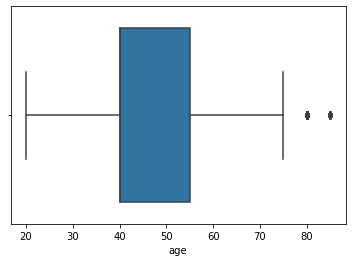

C:\Users\91959\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


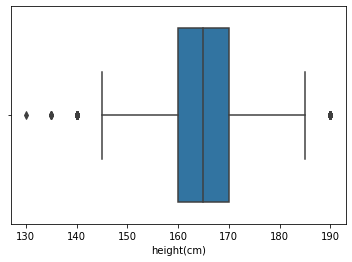

C:\Users\91959\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


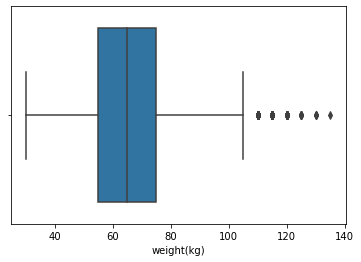

C:\Users\91959\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


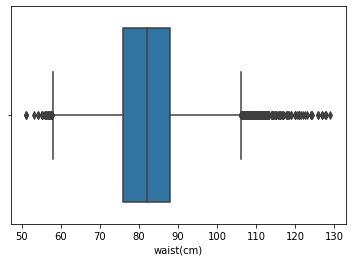

C:\Users\91959\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


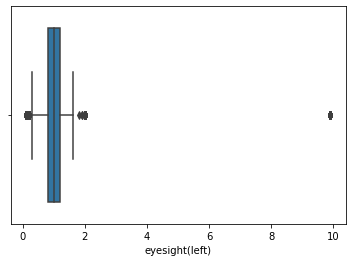

C:\Users\91959\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


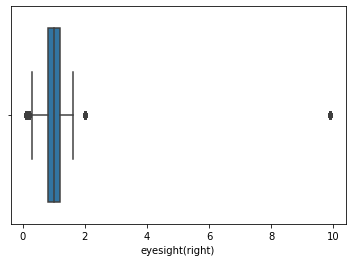

C:\Users\91959\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


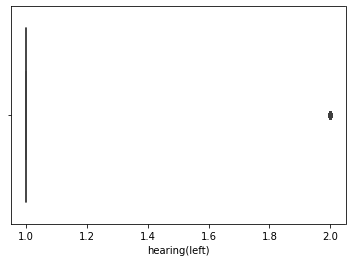

C:\Users\91959\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


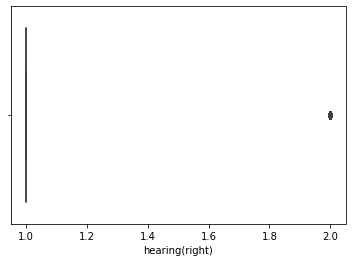

C:\Users\91959\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


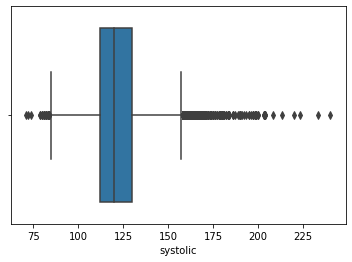

C:\Users\91959\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


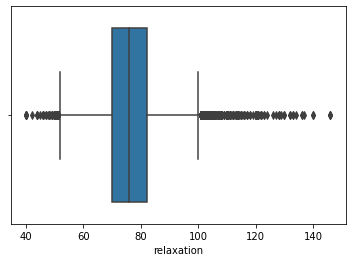

C:\Users\91959\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


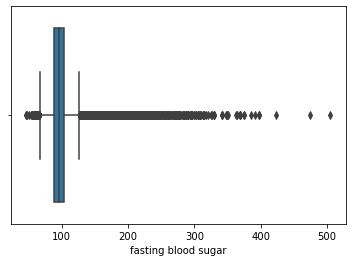

C:\Users\91959\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


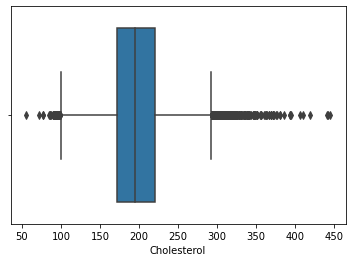

C:\Users\91959\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


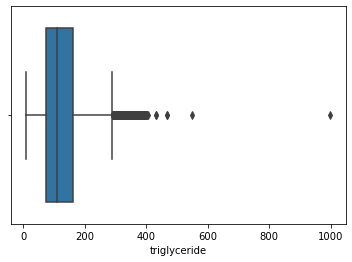

C:\Users\91959\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


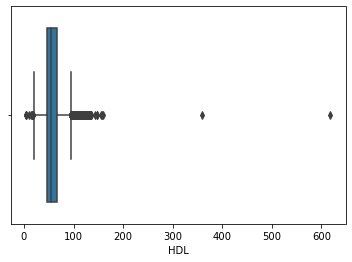

C:\Users\91959\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


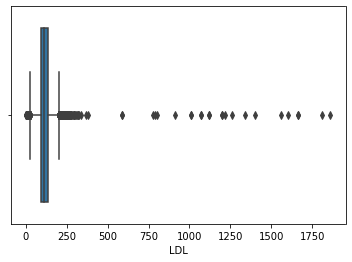

C:\Users\91959\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


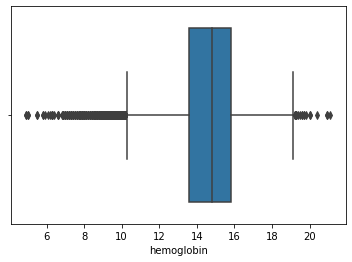

C:\Users\91959\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


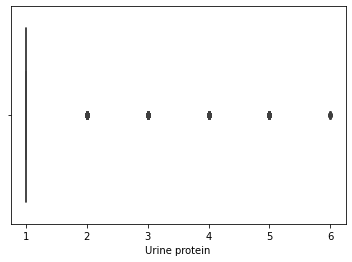

C:\Users\91959\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


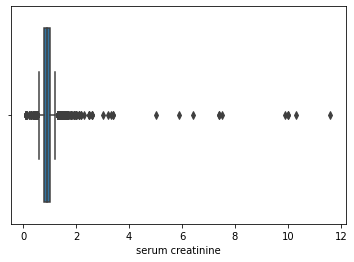

C:\Users\91959\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


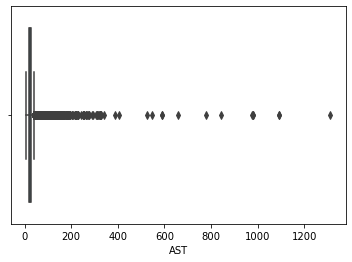

C:\Users\91959\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


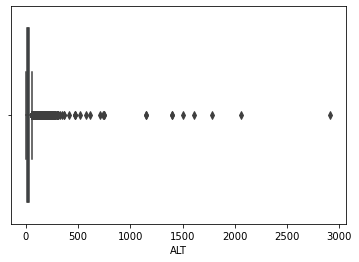

C:\Users\91959\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


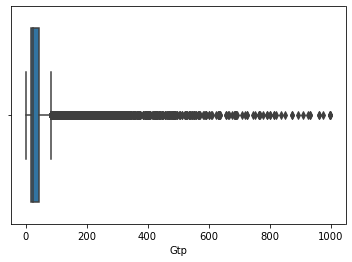

C:\Users\91959\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


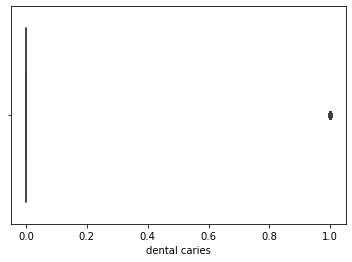

C:\Users\91959\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


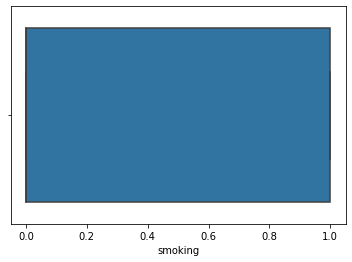

In [11]:
for i in df.columns:
    if (df[i].dtypes=='int64' or df[i].dtypes=='float64'):
        sns.boxplot(df[i])
    plt.show()
    

# Data Cleaning
**Performing One Hot Encoding for 
categorical features of a dataframe**

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['tartar'] = le.fit_transform(df['tartar'])
df['dental caries'] = le.fit_transform(df['dental caries'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  int32  
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 


# Feature selection using feature importance 
**Feature importance is a technique 
that calculate a score for all the 
input features for a given model. So 
out of 24 features we will select the 
top 15 features based on the score.**


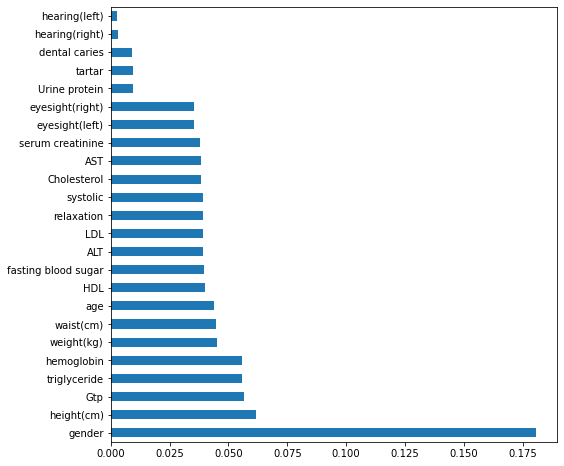

In [14]:
X = df.iloc[:,:-1]
y = df['smoking']

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
df1 = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(8,8))
df1.nlargest(24).plot(kind='barh')
plt.show()

# Logistic Regression


In [15]:
X = df[['gender','height(cm)','Gtp','hemoglobin','triglyceride','age','weight(kg)','waist(cm)','HDL',
        'serum creatinine','ALT','fasting blood sugar','relaxation','LDL','systolic']]
y = df['smoking']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)



In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
      

**Calculating accuracy 
and generating the 
classification report 
of Logistic Regression**


In [17]:
from sklearn.metrics import accuracy_score, classification_report
print(f'Accuracy Score : {accuracy_score(y_test,y_pred)}')
print(classification_report(y_test,y_pred))
      

Accuracy Score : 0.7348954125145883
              precision    recall  f1-score   support

           0       0.81      0.76      0.78      7027
           1       0.63      0.69      0.66      4112

    accuracy                           0.73     11139
   macro avg       0.72      0.73      0.72     11139
weighted avg       0.74      0.73      0.74     11139



# Decision Tree
**The accuracy of the logistic regression model is
78 percentage**


In [18]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred2 = dt.predict(x_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      7027
           1       0.71      0.70      0.70      4112

    accuracy                           0.78     11139
   macro avg       0.77      0.77      0.77     11139
weighted avg       0.78      0.78      0.78     11139



# Bagging Algorithm – Bagging Classifier
**Bootstrap Aggregation or bagging involves taking multiple samples from the training dataset 
(with replacement) and training a model for each sample.**

In [19]:
from sklearn.ensemble import BaggingClassifier
bagging_clf = BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators=1000)

bagging_clf.fit(x_train,y_train).score(x_test,y_test)
y_pred3 = bagging_clf.predict(x_test)

print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      7027
           1       0.75      0.80      0.77      4112

    accuracy                           0.83     11139
   macro avg       0.81      0.82      0.82     11139
weighted avg       0.83      0.83      0.83     11139



# Bagging Algorithm – Extra Trees


In [20]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_estimators=1000, random_state=42)
et.fit(x_train,y_train)

y_pred4 = et.predict(x_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      7027
           1       0.75      0.82      0.78      4112

    accuracy                           0.83     11139
   macro avg       0.82      0.83      0.82     11139
weighted avg       0.83      0.83      0.83     11139



# Bagging Algorithm – Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000)
rf.fit(x_train,y_train)

y_pred5 = rf.predict(x_test)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      7027
           1       0.75      0.80      0.78      4112

    accuracy                           0.83     11139
   macro avg       0.82      0.82      0.82     11139
weighted avg       0.83      0.83      0.83     11139

